In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

from dyn_fed.losses import HingeLoss
from dyn_fed.models.svm import SVM
import dyn_fed as df

%load_ext autoreload
%autoreload 2
%matplotlib inline

## Play dataset

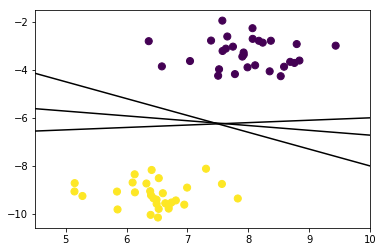

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(
    n_samples=60,
    centers=2,
    random_state=6,
    cluster_std=0.60
)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50);

xfit = np.linspace(4.5, 10)

for m, b in [(-0.7, -1), (-0.2, -4.72), (0.1, -7)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(4.5, 10);

In [3]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [4]:
"""Plot the decision function for a 2D SVC"""
def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    cs = ax.contour(
        X, Y, P, colors='k',
        levels=[-1, 0, 1], alpha=0.5,
        linestyles=['--', '-', '--']
    )
    
    # plt.clabel(cs, inline=1, fontsize=10)
    # plt.title('Simplest default with labels')

    plt.annotate('hyperplane',(6,-5.95))
    plt.annotate('margin',(6,-4))
    plt.annotate('margin',(6,-7.9))

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors="none", color="black");
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

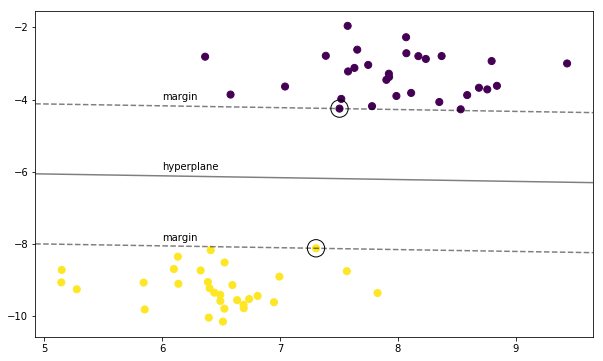

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50);
plot_svc_decision_function(model)
plt.savefig("../../fed-learn-thesis/figures/svm.png", dpi=500)

## Mnist

In [6]:
X_train, y_train, X_test, y_test = df.data.mnist.load_data()

In [7]:
#Input data
x = np.array([
    [-2,4,-1],
    [4,1,-1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],

])


#output label
y = np.array([-1, -1, 1, 1, 1])[:, np.newaxis]

In [8]:
# for val, inp in enumerate(x):
#     if y[val] == -1:
#         plt.scatter(inp[0], inp[1], s=100, marker='_', linewidths=5)
#     else:
#         plt.scatter(inp[0], inp[1], s=100, marker='+', linewidths=5)

# plt.plot([-2,6],[6,1])

In [9]:
# x.shape, y.shape

In [10]:
tmp = X_train.reshape(X_train.shape[0], -1)

In [26]:
inn = np.inner(tmp[0:30000], tmp[0:30000])

In [28]:
inn.sum(axis=1).shape

(30000,)

In [22]:
(60000-1) / 2

29999.5

In [20]:
n = 60000
n*(n - 1)/2

1799970000.0

In [17]:
n_samples, n_features = tmp.shape
n_classes = y_train[..., None].shape[1]

In [21]:
w = np.random.randn(n_features, n_classes)
b = np.random.randn(n_classes, 1)

In [26]:
tmp[0:20000].dot(tmp[0:20000].T).shape

(20000, 20000)

In [ ]:
X_train - X_train[:, np.newaxis, :]

In [ ]:
def rbf(x, gamma=0.1):
    np.exp(np.linalg.norm(x))

In [10]:
n_samples, n_features = x.shape
n_classes = y.shape[1]

In [11]:
loss_func = HingeLoss()

In [89]:
# Init hyperparams
alpha = 0.01
epochs = 100
reg_param = 1 / np.arange(epochs)
losses = []

# Init weights
# w = np.zeros((n_features, n_classes))
w = np.random.randn(n_features, n_classes)
b = np.random.randn(n_classes, 1)

for epoch in tqdm(range(1, epochs), leave=False):
    epoch_losses = []
    for i in np.arange(x.shape[0]):
        # y_pred = svm.forward(x)
        y_pred = np.dot(x[i], w) + b
        # print(f"y_pred.shape={y_pred.shape}")
        loss_val = (y[i] * y_pred).flatten()[0]
        loss_val = np.max([0, 1 - loss_val])
        epoch_losses.append(loss_val)
        # print(f"loss_val={loss_val}")
        # loss = np.where(loss_val < 1, 1 - loss_val, 0)
        # print(f"{x.shape}, y.shape={y.shape}")
        # d_w = -y[i] * x[i] if loss_val < 1 else np.zeros_like(w)
        d_w = -y * x if loss_val < 1 else np.zeros_like(loss_val)
        # print(f"d_w.shape={d_w.shape}")
        # loss = loss_func.loss(y, y_pred, reg_param=reg_param)
        # d_w = loss_func.grad(y, y_pred, x=x, w=w, reg_param=reg_param)
        w = w - alpha * d_w
    epoch_loss = np.mean(epoch_losses)
    losses.append(epoch_loss)
    if epoch % 1 == 0:
        print(f"Epoch={epoch}, loss={epoch_loss}")

/Users/sashlinreddy/miniconda3/envs/ftml/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


Epoch=1, loss=-0.23238441944975854
Epoch=2, loss=-0.2777641037986389
Epoch=3, loss=-0.3094381392174711
Epoch=4, loss=-0.3350352914582526
Epoch=5, loss=-0.3570868400185384
Epoch=6, loss=-0.37677826182159196
Epoch=7, loss=-0.39477048947989585
Epoch=8, loss=-0.4114737997903422
Epoch=9, loss=-0.4271622774013002
Epoch=10, loss=-0.44202910026132025
Epoch=11, loss=-0.45621610658437195
Epoch=12, loss=-0.46983085745243347
Epoch=13, loss=-0.48295708362922535
Epoch=14, loss=-0.49566139251395996
Epoch=15, loss=-0.5079977450148118
Epoch=16, loss=-0.5200105427332614
Epoch=17, loss=-0.5317368165091617
Epoch=18, loss=-0.5432078152389389
Epoch=19, loss=-0.55445018340496
Epoch=20, loss=-0.5654868497662395
Epoch=21, loss=-0.5763377089190043
Epoch=22, loss=-0.5870201515405512
Epoch=23, loss=-0.5975494822431566
Epoch=24, loss=-0.6079392526978602
Epoch=25, loss=-0.618201530014723
Epoch=26, loss=-0.6283471150427428
Epoch=27, loss=-0.6383857214968174
Epoch=28, loss=-0.6483261241286101
Epoch=29, loss=-0.658176

In [121]:
# Init hyperparams
alpha = 0.01
epochs = 100
reg_param = 1 / np.arange(epochs)
losses = []

# Init weights
# w = np.zeros((n_features, n_classes))
w = np.random.randn(n_features, n_classes)
b = np.random.randn(n_classes, 1)

for epoch in tqdm(range(1, epochs), leave=False):
    epoch_losses = []
    # y_pred = svm.forward(x)
    y_pred = np.dot(x, w) + b
    # Calculate loss
    loss_val = np.maximum(0, 1 - (y * y_pred))
    loss_val = np.mean(loss_val)
    epoch_losses.append(loss_val)
    # Calculate gradients
    d_w = -y * x if loss_val < 1 else np.zeros_like(w)
    # Apply gradients
    w = w - alpha * d_w
    # epoch_loss = np.mean(epoch_losses)
    losses.append(epoch_loss)
    if epoch % 10 == 0:
        print(f"Epoch={epoch}, loss={epoch_loss}")

/Users/sashlinreddy/miniconda3/envs/ftml/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
Epoch=10, loss=2.671874417708031
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
Epoch=20, loss=2.671874417708031
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
Epoch=30, loss=2.671874417708031
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
Epoch=40, loss=2.671874417708031
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
Epoch=50, loss=2.671874417708031
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
Epoch=60, loss=2.671874417708031
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
Epoch=70, loss=2.671874417708031
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
Epoch=80, loss=2.671874417708031
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
Epoch=90, loss=2.671874417708031
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)


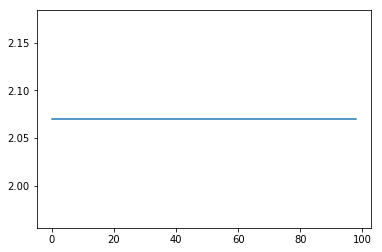

In [107]:
plt.plot(np.arange(len(losses)), losses)